In [0]:
%%time
from pyspark.sql.functions import col,count, sum
from pyspark.sql.types import IntegerType, DoubleType, BooleanType, DateType
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


CPU times: user 99 µs, sys: 16 µs, total: 115 µs
Wall time: 122 µs


In [0]:
configs = {"fs.azure.account.auth.type": "OAuth",
"fs.azure.account.oauth.provider.type": "org.apache.hadoop.fs.azurebfs.oauth2.ClientCredsTokenProvider",
"fs.azure.account.oauth2.client.id": #client id,
"fs.azure.account.oauth2.client.secret": #client secret,
"fs.azure.account.oauth2.client.endpoint": "https://login.microsoftonline.com/ #tenet id/oauth2/token"}

dbutils.fs.mount(
source = "abfss://tokyo-olypics-data@tokyoolimpicsjoaocc.dfs.core.windows.net/", # container@storage account
mount_point = "/mnt/tokyoolympics",
extra_configs = configs)

In [0]:
%fs 
ls "/mnt/tokyoolympics"

path,name,size,modificationTime
dbfs:/mnt/tokyoolympics/raw-data/,raw-data/,0,1699923660000
dbfs:/mnt/tokyoolympics/transformed-data/,transformed-data/,0,1699923679000


In [0]:
# Reading files 

athletes = spark.read.csv("/mnt/tokyoolympics/raw-data/Athlete.csv", header=True)
coaches = spark.read.csv("/mnt/tokyoolympics/raw-data/coaches.csv", header=True)
entriesgender = spark.read.csv("/mnt/tokyoolympics/raw-data/EntriesGender.csv", header=True, inferSchema=True)
medals = spark.read.csv("/mnt/tokyoolympics/raw-data/Medals.csv", header=True, inferSchema=True)
teams = spark.read.csv("/mnt/tokyoolympics/raw-data/Teams.csv", header=True, inferSchema=True)

In [0]:
athletes.show()
#athletes.printSchema()

+--------------------+--------------------+-------------------+
|          PersonName|             Country|         Discipline|
+--------------------+--------------------+-------------------+
|     AALERUD Katrine|              Norway|       Cycling Road|
|         ABAD Nestor|               Spain|Artistic Gymnastics|
|   ABAGNALE Giovanni|               Italy|             Rowing|
|      ABALDE Alberto|               Spain|         Basketball|
|       ABALDE Tamara|               Spain|         Basketball|
|           ABALO Luc|              France|           Handball|
|        ABAROA Cesar|               Chile|             Rowing|
|       ABASS Abobakr|               Sudan|           Swimming|
|    ABBASALI Hamideh|Islamic Republic ...|             Karate|
|       ABBASOV Islam|          Azerbaijan|          Wrestling|
|        ABBINGH Lois|         Netherlands|           Handball|
|         ABBOT Emily|           Australia|Rhythmic Gymnastics|
|       ABBOTT Monica|United States of .

In [0]:
coaches.show()
#coaches.printSchema()

+--------------------+--------------------+-----------------+--------+
|                Name|             Country|       Discipline|   Event|
+--------------------+--------------------+-----------------+--------+
|     ABDELMAGID Wael|               Egypt|         Football|    null|
|           ABE Junya|               Japan|       Volleyball|    null|
|       ABE Katsuhiko|               Japan|       Basketball|    null|
|        ADAMA Cherif|       Côte d'Ivoire|         Football|    null|
|          AGEBA Yuya|               Japan|       Volleyball|    null|
|AIKMAN Siegfried ...|               Japan|           Hockey|     Men|
|       AL SAADI Kais|             Germany|           Hockey|     Men|
|       ALAMEDA Lonni|              Canada|Baseball/Softball|Softball|
|     ALEKNO Vladimir|Islamic Republic ...|       Volleyball|     Men|
|     ALEKSEEV Alexey|                 ROC|         Handball|   Women|
|ALLER CARBALLO Ma...|               Spain|       Basketball|    null|
|     

In [0]:
entriesgender.show()
entriesgender.printSchema()

+--------------------+------+----+-----+
|          Discipline|Female|Male|Total|
+--------------------+------+----+-----+
|      3x3 Basketball|    32|  32|   64|
|             Archery|    64|  64|  128|
| Artistic Gymnastics|    98|  98|  196|
|   Artistic Swimming|   105|   0|  105|
|           Athletics|   969|1072| 2041|
|           Badminton|    86|  87|  173|
|   Baseball/Softball|    90| 144|  234|
|          Basketball|   144| 144|  288|
|    Beach Volleyball|    48|  48|   96|
|              Boxing|   102| 187|  289|
|        Canoe Slalom|    41|  41|   82|
|        Canoe Sprint|   123| 126|  249|
|Cycling BMX Frees...|    10|   9|   19|
|  Cycling BMX Racing|    24|  24|   48|
|Cycling Mountain ...|    38|  38|   76|
|        Cycling Road|    70| 131|  201|
|       Cycling Track|    90|  99|  189|
|              Diving|    72|  71|  143|
|          Equestrian|    73| 125|  198|
|             Fencing|   107| 108|  215|
+--------------------+------+----+-----+
only showing top

In [0]:
medals.show()
#medals.printSchema()

+----+--------------------+----+------+------+-----+-------------+
|Rank|        Team_Country|Gold|Silver|Bronze|Total|Rank by Total|
+----+--------------------+----+------+------+-----+-------------+
|   1|United States of ...|  39|    41|    33|  113|            1|
|   2|People's Republic...|  38|    32|    18|   88|            2|
|   3|               Japan|  27|    14|    17|   58|            5|
|   4|       Great Britain|  22|    21|    22|   65|            4|
|   5|                 ROC|  20|    28|    23|   71|            3|
|   6|           Australia|  17|     7|    22|   46|            6|
|   7|         Netherlands|  10|    12|    14|   36|            9|
|   8|              France|  10|    12|    11|   33|           10|
|   9|             Germany|  10|    11|    16|   37|            8|
|  10|               Italy|  10|    10|    20|   40|            7|
|  11|              Canada|   7|     6|    11|   24|           11|
|  12|              Brazil|   7|     6|     8|   21|          

In [0]:
#teams.show()
teams.printSchema()

root
 |-- TeamName: string (nullable = true)
 |-- Discipline: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Event: string (nullable = true)



In [0]:
# Find the top countrie with the highest number of gold medals

top_gold_medal_country = medals.orderBy("Gold", ascending=False).select("Team_Country", "Gold").show()

+--------------------+----+
|        Team_Country|Gold|
+--------------------+----+
|United States of ...|  39|
|People's Republic...|  38|
|               Japan|  27|
|       Great Britain|  22|
|                 ROC|  20|
|           Australia|  17|
|         Netherlands|  10|
|              France|  10|
|             Germany|  10|
|               Italy|  10|
|              Canada|   7|
|              Brazil|   7|
|         New Zealand|   7|
|                Cuba|   7|
|             Hungary|   6|
|   Republic of Korea|   6|
|              Poland|   4|
|      Czech Republic|   4|
|               Kenya|   4|
|              Norway|   4|
+--------------------+----+
only showing top 20 rows



In [0]:
# Calculate the proportion number of entries by gender for each discipline

average_entries_by_gender = entriesgender.withColumn("Female_AVG", entriesgender["Female"]/entriesgender["Total"]).withColumn("Male_AVG", entriesgender["Male"]/entriesgender["Total"])
average_entries_by_gender.select("Discipline","Female_AVG","Male_AVG" ).show()


+--------------------+-------------------+-------------------+
|          Discipline|         Female_AVG|           Male_AVG|
+--------------------+-------------------+-------------------+
|      3x3 Basketball|                0.5|                0.5|
|             Archery|                0.5|                0.5|
| Artistic Gymnastics|                0.5|                0.5|
|   Artistic Swimming|                1.0|                0.0|
|           Athletics| 0.4747672709456149| 0.5252327290543851|
|           Badminton|0.49710982658959535| 0.5028901734104047|
|   Baseball/Softball|0.38461538461538464| 0.6153846153846154|
|          Basketball|                0.5|                0.5|
|    Beach Volleyball|                0.5|                0.5|
|              Boxing|0.35294117647058826| 0.6470588235294118|
|        Canoe Slalom|                0.5|                0.5|
|        Canoe Sprint| 0.4939759036144578| 0.5060240963855421|
|Cycling BMX Frees...| 0.5263157894736842|0.47368421052

In [0]:
# When the transformation is ready run the cell .mode("overwrite")

athletes.write.option("header","true").csv("/mnt/tokyoolympics1/transformed-data/athletes")
coaches.write.option("header","true").csv("/mnt/tokyoolympics1/transformed-data/coaches")
entriesgender.write.option("header","true").csv("/mnt/tokyoolympics1/transformed-data/entriesgender")
medals.write.option("header","true").csv("/mnt/tokyoolympics1/transformed-data/medals")
teams.write.option("header","true").csv("/mnt/tokyoolympics1/transformed-data/teams")


In [0]:
# Checking null values in tables

def null_values(*datasets):
    for i, df in enumerate(datasets):
        dataset_name = df.name if hasattr(df, 'name') else f'Dataset {i + 1}'
        print(f'Total of null values in DataFrame {dataset_name}:')
        for column in df.columns:
            count_null = df.filter(col(column).isNull()).count()
            print(f'{column}: {count_null} null values')
        print('\n')


null_values(athletes, coaches, entriesgender, medals, teams)


Total of null values in DataFrame Dataset 1:
PersonName: 0 null values
Country: 0 null values
Discipline: 0 null values


Total of null values in DataFrame Dataset 2:
Name: 0 null values
Country: 0 null values
Discipline: 0 null values
Event: 145 null values


Total of null values in DataFrame Dataset 3:
Discipline: 0 null values
Female: 0 null values
Male: 0 null values
Total: 0 null values


Total of null values in DataFrame Dataset 4:
Rank: 0 null values
Team_Country: 0 null values
Gold: 0 null values
Silver: 0 null values
Bronze: 0 null values
Total: 0 null values
Rank by Total: 0 null values


Total of null values in DataFrame Dataset 5:
TeamName: 0 null values
Discipline: 0 null values
Country: 0 null values
Event: 0 null values




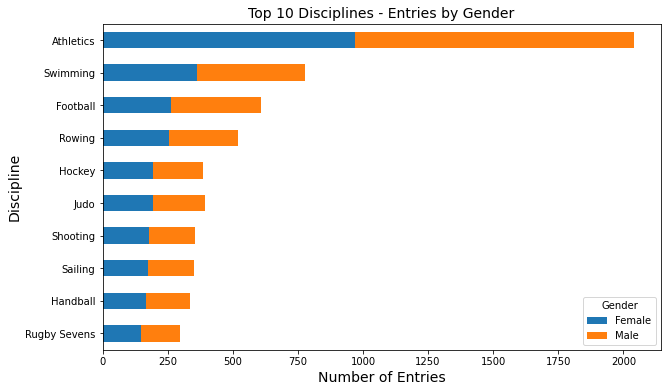

In [0]:

# Assuming each dataset has a name attribute
entriesgender.name = 'EntriesGender'

# Convert Spark DataFrame to Pandas DataFrame
entriesgender_pd = entriesgender.toPandas()

# Sort DataFrame by 'Total' column in ascending order and select the top 10
top_disciplines_pd = entriesgender_pd.nlargest(10, 'Total').set_index('Discipline')[['Female', 'Male']].sort_values(by='Female', ascending=True)

# Create a horizontal stacked bar plot for the top 10 disciplines
top_disciplines_pd.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.title('Top 10 Disciplines - Entries by Gender', fontsize=14)
plt.xlabel('Number of Entries', fontsize=14)
plt.ylabel('Discipline', fontsize=14)
plt.legend(title='Gender', loc='lower right', labels=['Female', 'Male'])

# Show the plot
plt.show()

In [0]:
athletes.show()

+--------------------+--------------------+-------------------+
|          PersonName|             Country|         Discipline|
+--------------------+--------------------+-------------------+
|     AALERUD Katrine|              Norway|       Cycling Road|
|         ABAD Nestor|               Spain|Artistic Gymnastics|
|   ABAGNALE Giovanni|               Italy|             Rowing|
|      ABALDE Alberto|               Spain|         Basketball|
|       ABALDE Tamara|               Spain|         Basketball|
|           ABALO Luc|              France|           Handball|
|        ABAROA Cesar|               Chile|             Rowing|
|       ABASS Abobakr|               Sudan|           Swimming|
|    ABBASALI Hamideh|Islamic Republic ...|             Karate|
|       ABBASOV Islam|          Azerbaijan|          Wrestling|
|        ABBINGH Lois|         Netherlands|           Handball|
|         ABBOT Emily|           Australia|Rhythmic Gymnastics|
|       ABBOTT Monica|United States of .

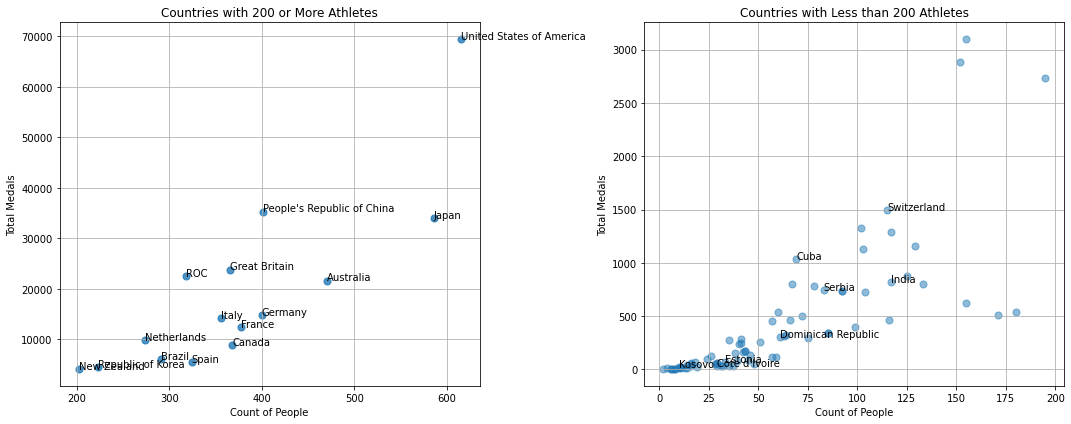

In [0]:
# Joining athletes and medals DataFrames
joined_data = athletes.join(medals, athletes.Country == medals.Team_Country, "inner").select(athletes.Country, medals.Total)

# Counting the number of people for each country
people_count_by_country = joined_data.groupBy("Country").agg(count("Country").alias("PeopleCount"), sum("Total").alias("TotalMedals")).toPandas()

# Filter data for countries with 200 or more athletes
large_countries = people_count_by_country[people_count_by_country["PeopleCount"] >= 200]

# Filter data for countries with less than 200 athletes
small_countries = people_count_by_country[people_count_by_country["PeopleCount"] < 200]

# Create separate scatter plots
plt.figure(figsize=(15, 6))

# Plot for countries with 200 or more athletes
plt.subplot(1, 2, 1)
plt.scatter(large_countries["PeopleCount"], large_countries["TotalMedals"], alpha=0.8, s=50)  # Increased point size
plt.title('Countries with 200 or More Athletes')
plt.xlabel('Count of People')
plt.ylabel('Total Medals')
plt.grid(True)

# Annotate each point with the country name
for i, txt in enumerate(large_countries["Country"]):
    plt.annotate(txt, (large_countries["PeopleCount"].iloc[i], large_countries["TotalMedals"].iloc[i]))

# Plot for countries with less than 200 athletes
plt.subplot(1, 2, 2)
plt.scatter(small_countries["PeopleCount"], small_countries["TotalMedals"], alpha=0.5, s=50)  # Increased point size and transparency
plt.title('Countries with Less than 200 Athletes')
plt.xlabel('Count of People')
plt.ylabel('Total Medals')
plt.grid(True)

# Annotate a subset of points with the country name (e.g., every 10th point)
for i, txt in enumerate(small_countries["Country"].iloc[::10]):
    plt.annotate(txt, (small_countries["PeopleCount"].iloc[i * 10], small_countries["TotalMedals"].iloc[i * 10]))

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()